In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./water_potability.csv")
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

## Filling `ph` NaN values

<Axes: ylabel='Frequency'>

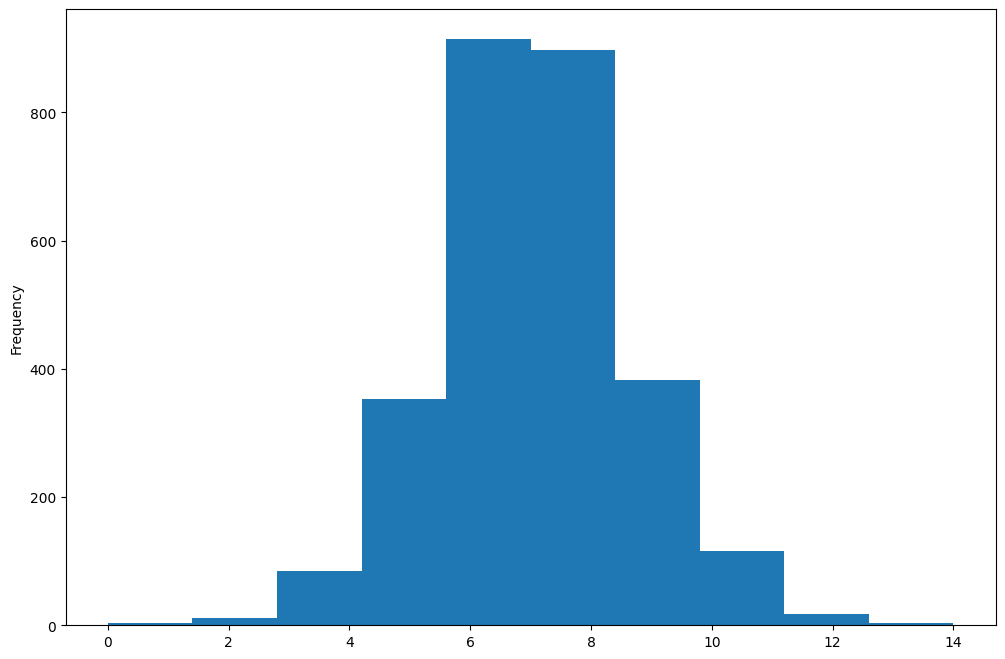

In [5]:
plt.figure(figsize=(12,8))
df.ph.plot.hist()

In [6]:
df.ph.describe()

count    2785.000000
mean        7.080795
std         1.594320
min         0.000000
25%         6.093092
50%         7.036752
75%         8.062066
max        14.000000
Name: ph, dtype: float64

<Axes: xlabel='ph', ylabel='Count'>

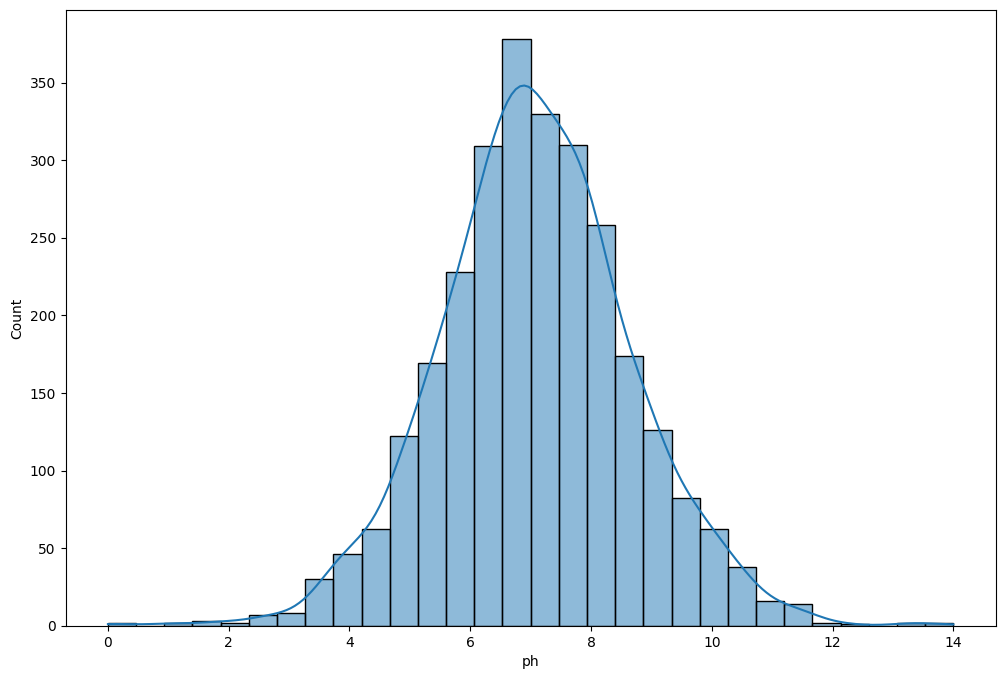

In [7]:
plt.figure(figsize=(12,8))
sns.histplot(df.ph, kde=True, bins=30)

In [8]:
df["ph"] = df.ph.fillna(df.ph.mean())

## Filling `Sulfate` NaN values

<Axes: ylabel='Frequency'>

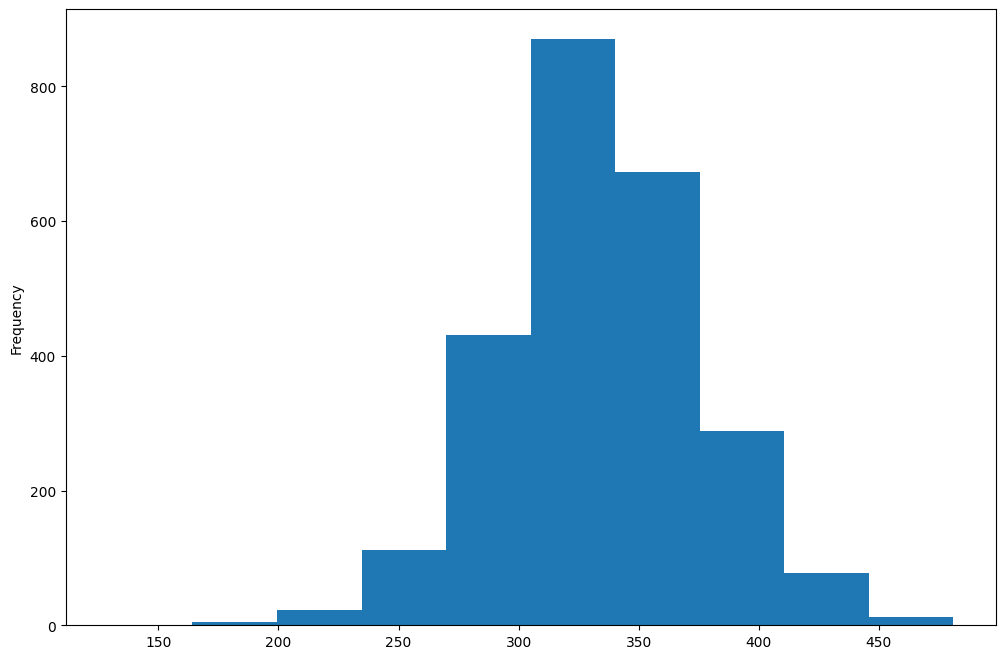

In [9]:
plt.figure(figsize=(12,8))
df.Sulfate.plot.hist()

<Axes: xlabel='Sulfate', ylabel='Count'>

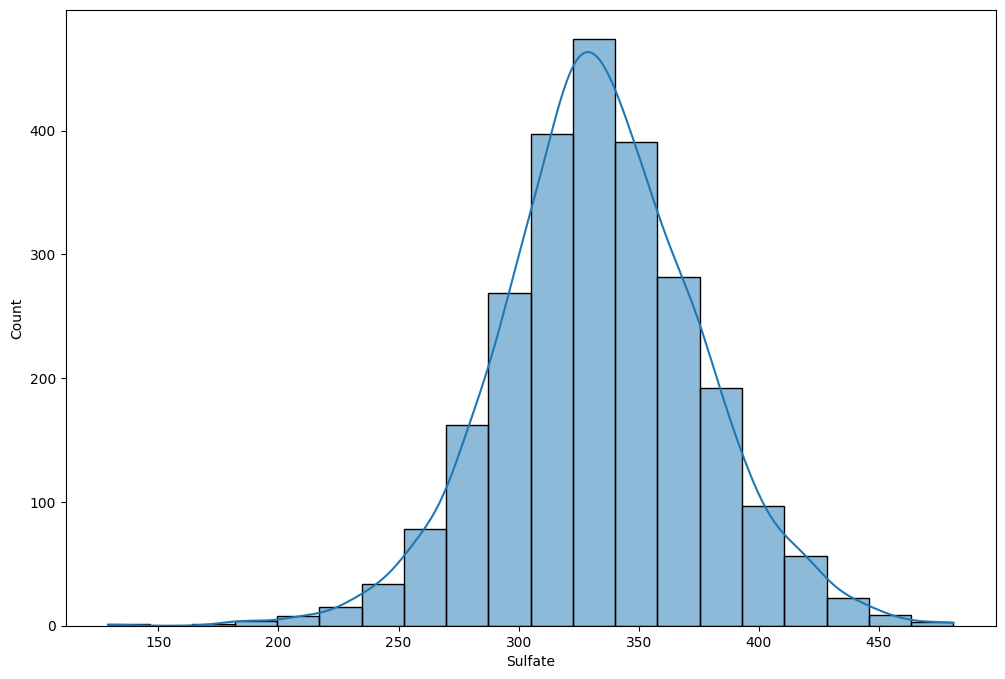

In [10]:
plt.figure(figsize=(12,8))
sns.histplot(df.Sulfate, kde=True, bins=20)

In [11]:
df.Sulfate.describe()

count    2495.000000
mean      333.775777
std        41.416840
min       129.000000
25%       307.699498
50%       333.073546
75%       359.950170
max       481.030642
Name: Sulfate, dtype: float64

In [12]:
df.Sulfate.mean() - df.Sulfate.std() / 2

313.0673563799772

In [13]:
df["Sulfate"] = df.Sulfate.fillna(df.Sulfate.mean() - df.Sulfate.std() / 2)

## Filling `Trihalomethanes` NaN values

<Axes: ylabel='Frequency'>

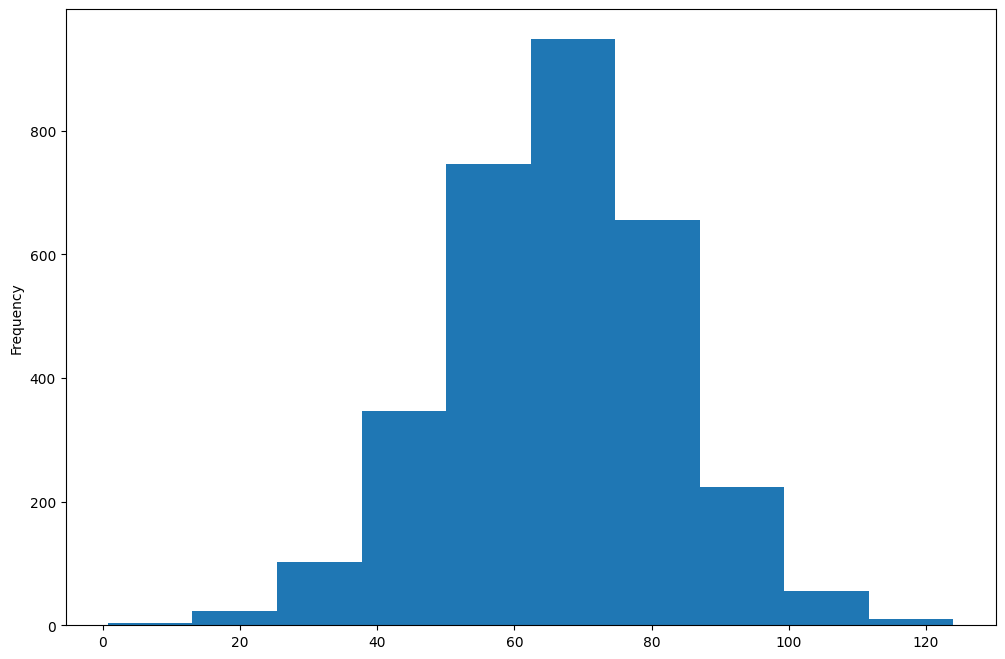

In [14]:
plt.figure(figsize=(12,8))
df.Trihalomethanes.plot.hist()

<Axes: xlabel='Trihalomethanes', ylabel='Count'>

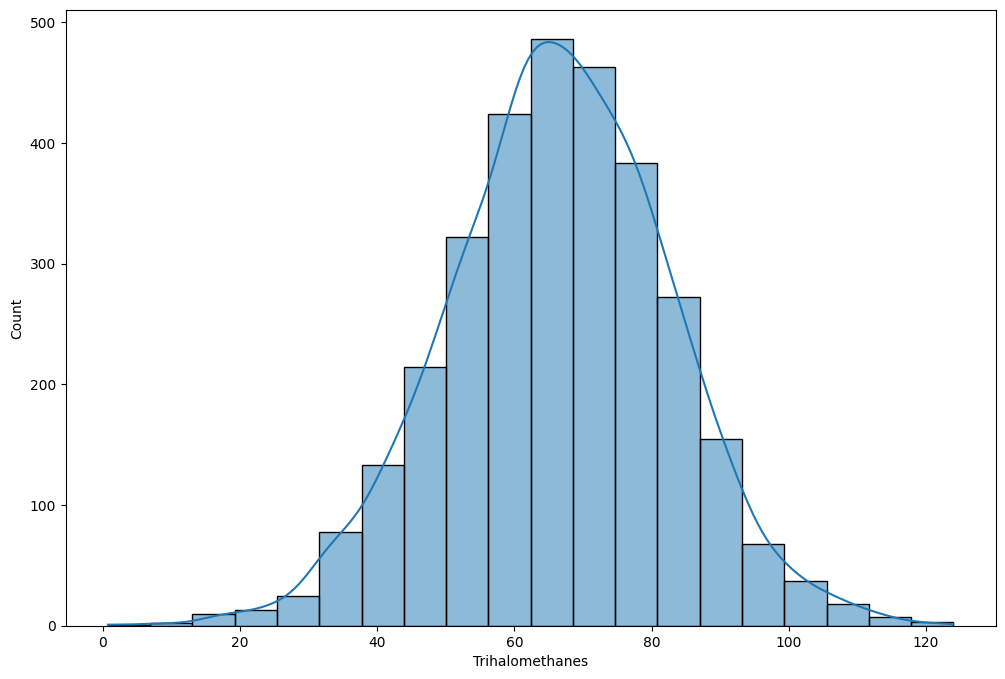

In [15]:
plt.figure(figsize=(12,8))
sns.histplot(df.Trihalomethanes, kde=True, bins=20)

In [16]:
df.Trihalomethanes.describe()

count    3114.000000
mean       66.396293
std        16.175008
min         0.738000
25%        55.844536
50%        66.622485
75%        77.337473
max       124.000000
Name: Trihalomethanes, dtype: float64

In [17]:
df["Trihalomethanes"] = df.Trihalomethanes.fillna(df.Trihalomethanes.mean())

## Exploratory Data Analysis - EDA

<Axes: xlabel='Potability', ylabel='count'>

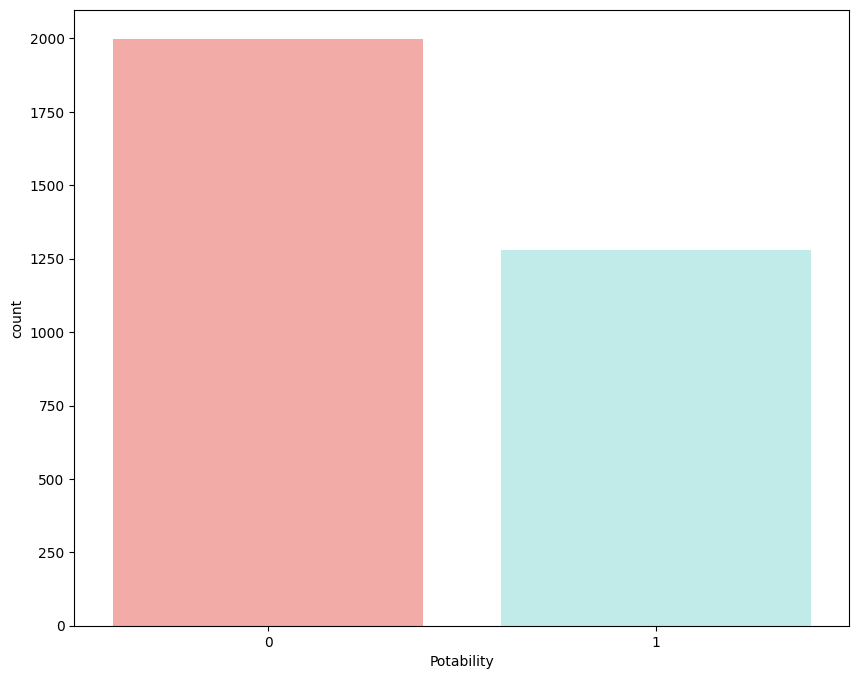

In [18]:
plt.figure(figsize=(10,8))
sns.countplot(x=df.Potability, palette=["#ff9f9b", "#b9f2f0"])

<Figure size 1000x800 with 0 Axes>

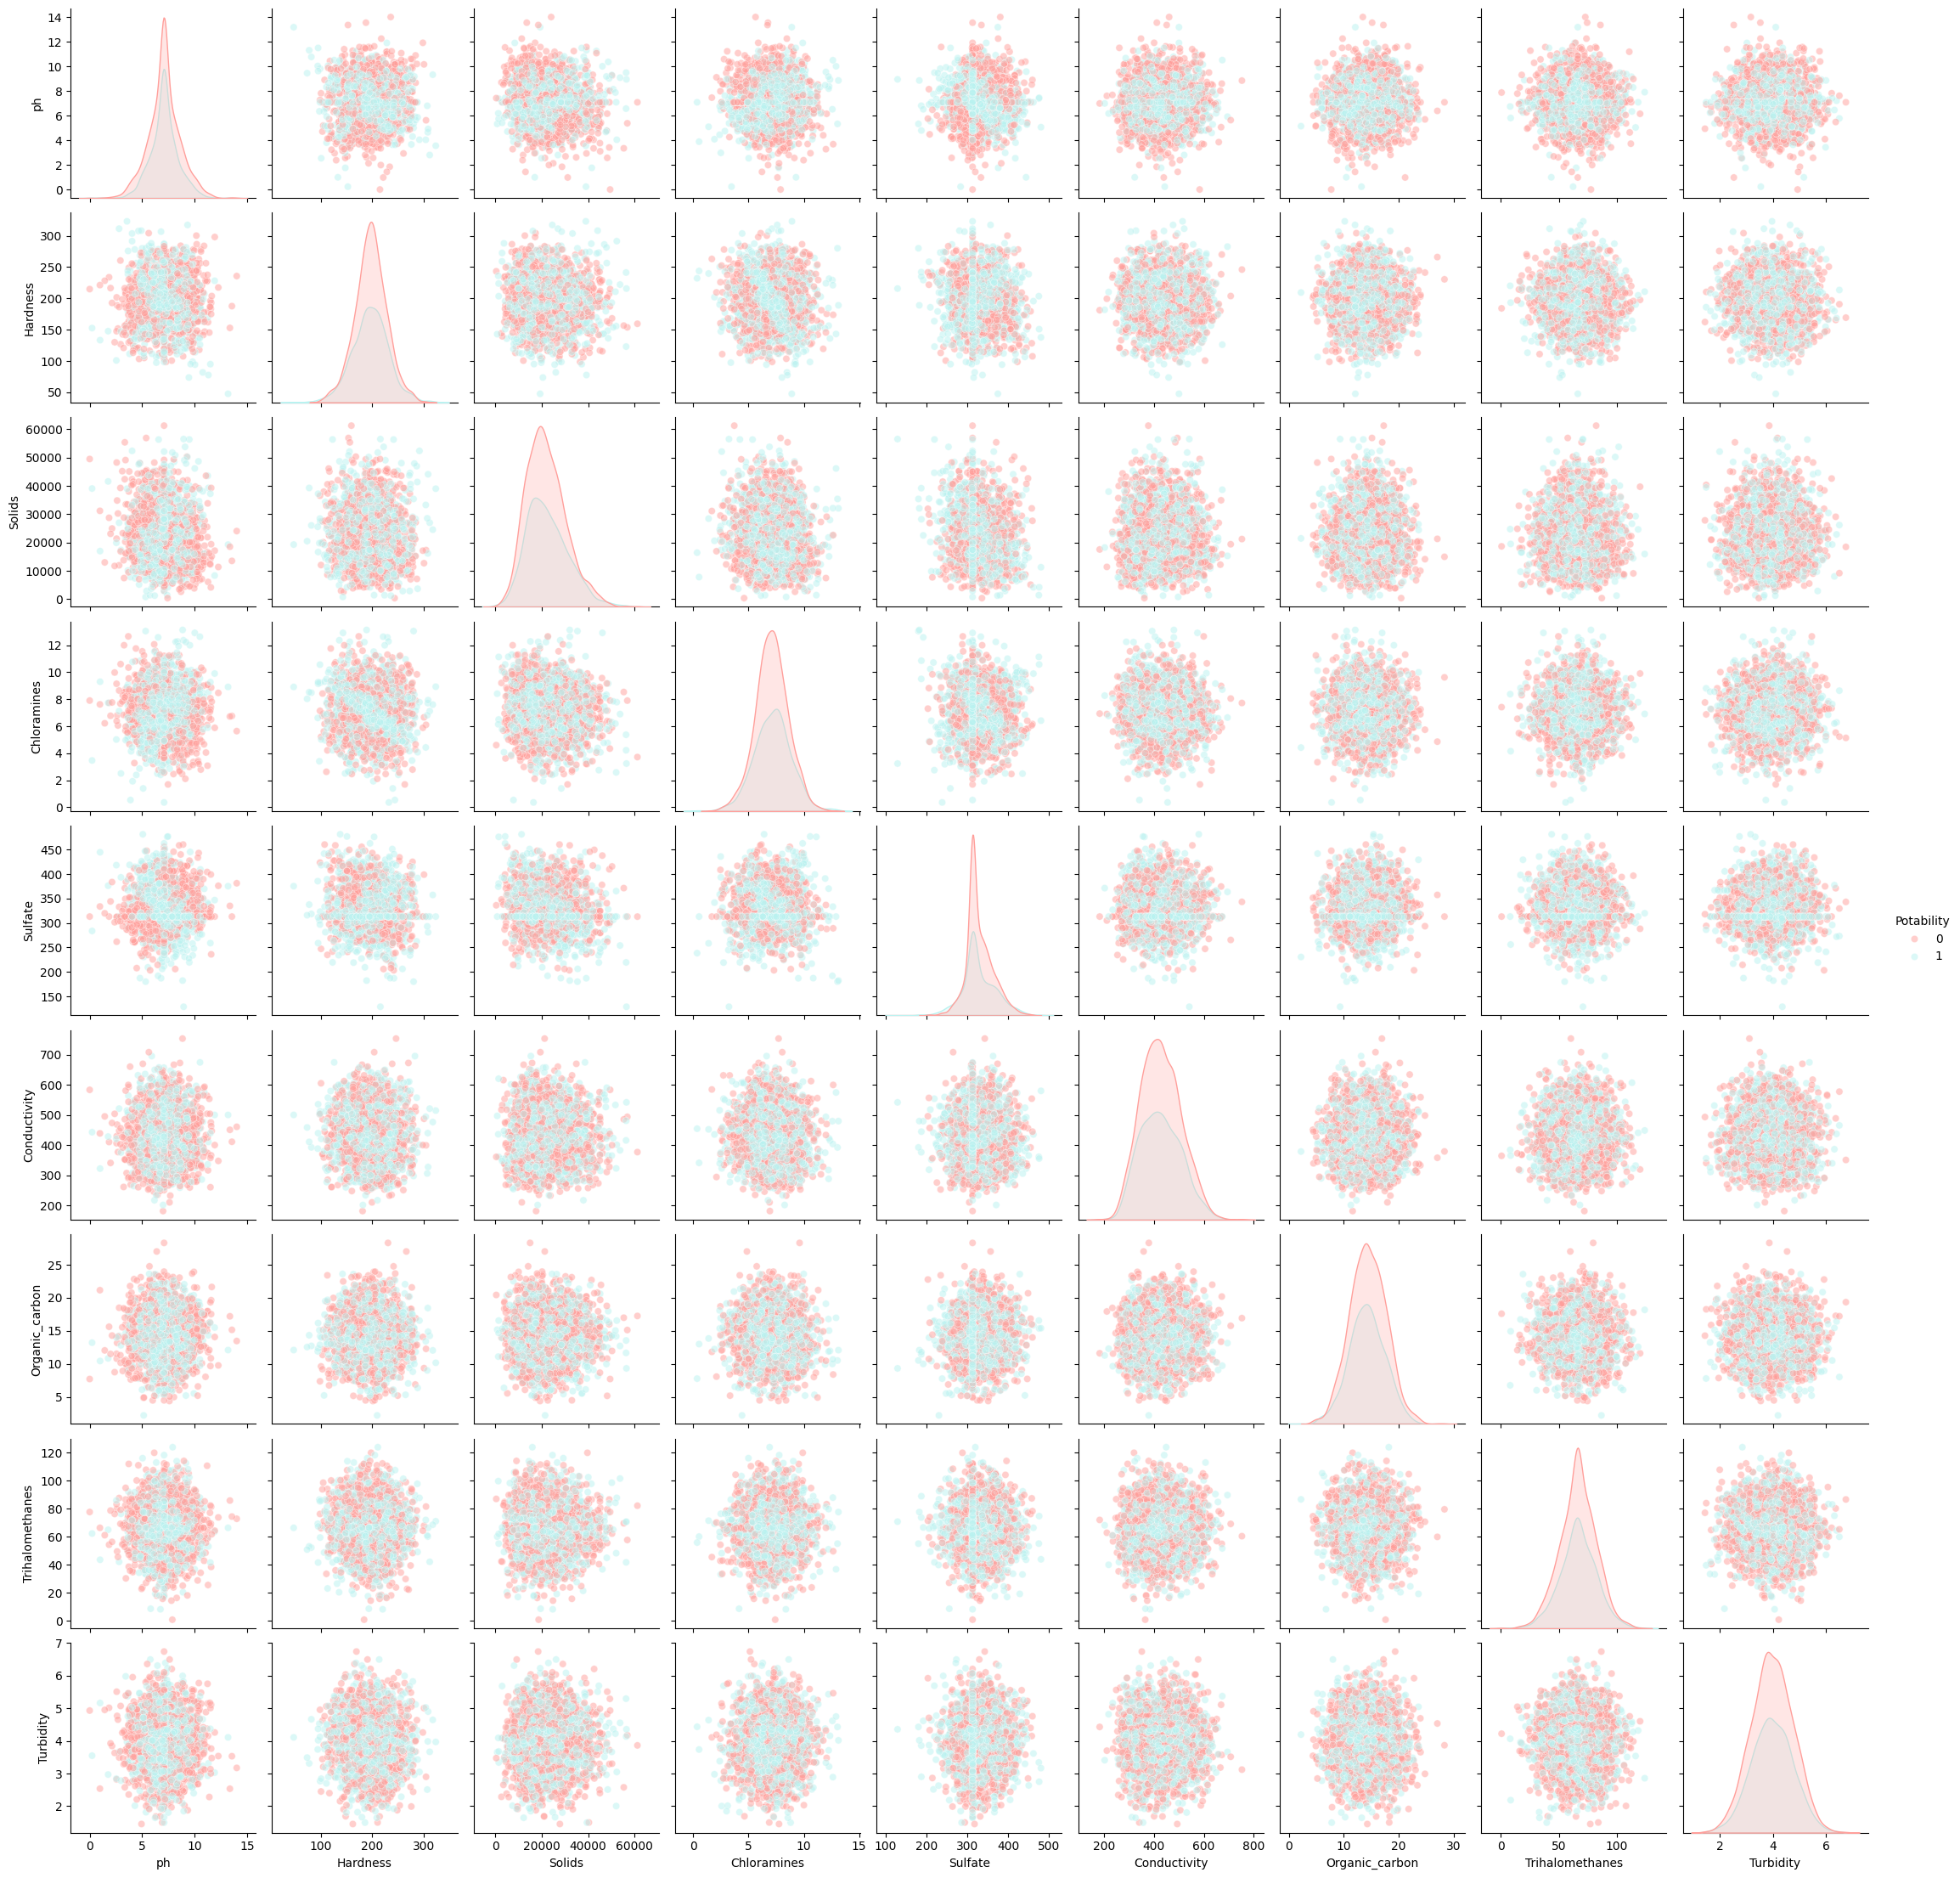

In [19]:
plt.figure(figsize=(10,8))
sns.pairplot(data=df, hue="Potability", palette=["#ff9f9b", "#b9f2f0"], plot_kws={'alpha':0.5})

<Axes: >

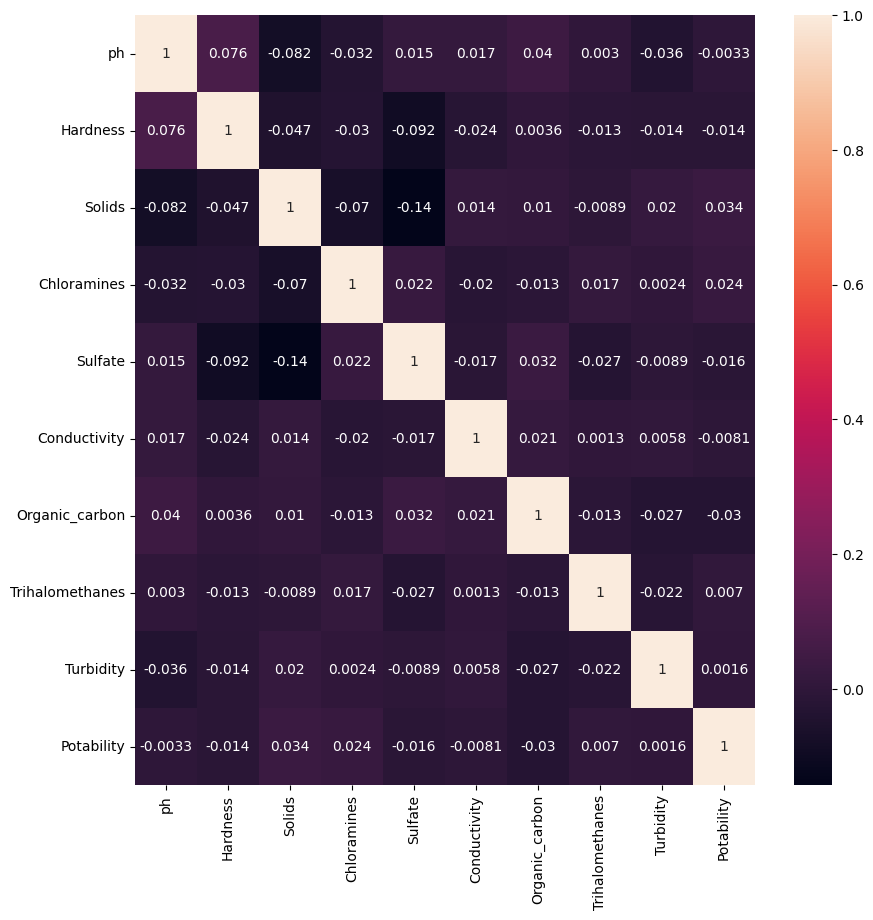

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [21]:
df.corr().Potability.sort_values(ascending=False)

Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.006960
Turbidity          0.001581
ph                -0.003287
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.015963
Organic_carbon    -0.030001
Name: Potability, dtype: float64

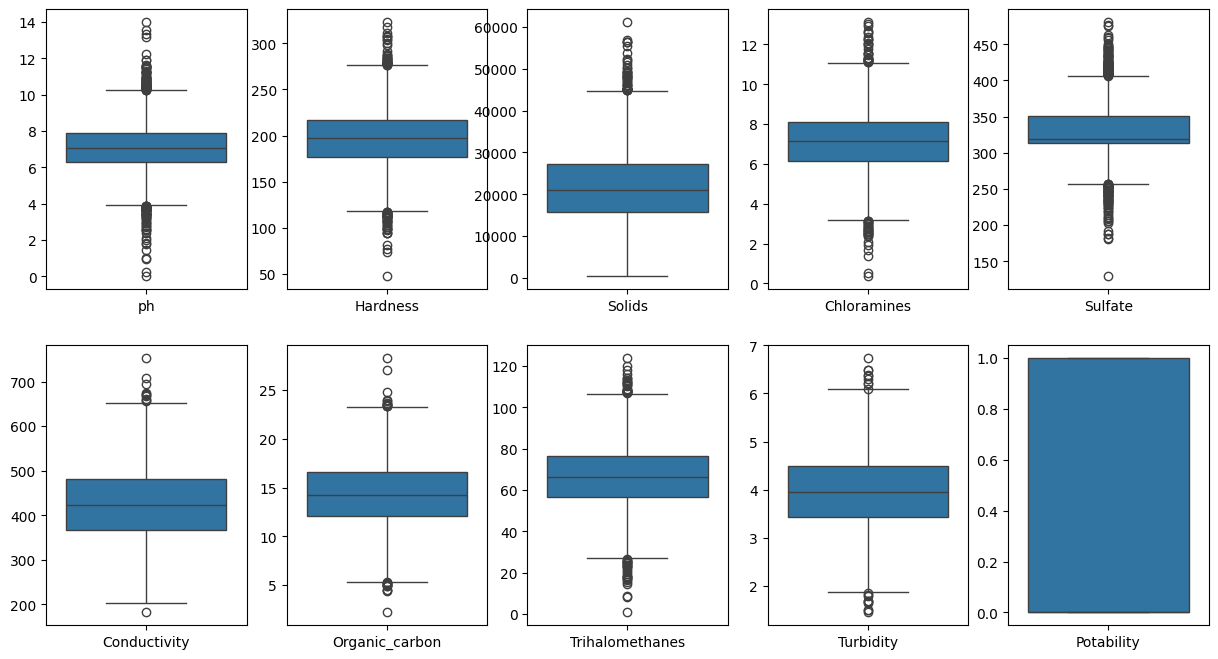

In [22]:
fig = plt.figure(figsize=(15,8))
for i, c in enumerate(df.columns, start=1):
    fig.add_subplot(2,5,i)
    sns.boxplot(df[[c]])

## Normalize Data

In [23]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

In [24]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  313.067356    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  313.067356    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [25]:
list(df.columns[:-1])

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

In [26]:
ct = make_column_transformer((MinMaxScaler(), list(df.columns[:-1])))

## Separate Features & Labels

In [27]:
X = df.drop("Potability", axis=1)
y = df["Potability"]
X.shape, y.shape

((3276, 9), (3276,))

## Split into Training & Test

In [28]:
# Get first 80%
len(df) * .80

2620.8

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2620, 9), (656, 9), (2620,), (656,))

## Transform Training & Test Data

In [32]:
ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [33]:
X_train_normal

array([[0.50577104, 0.64005634, 0.13793675, ..., 0.50692901, 0.51780876,
        0.37630925],
       [0.50577104, 0.39743368, 0.32420583, ..., 0.57942323, 0.577885  ,
        0.56108145],
       [0.40674825, 0.52957696, 0.30246455, ..., 0.43767464, 0.45097838,
        0.50245171],
       ...,
       [0.58159507, 0.63230108, 0.48414231, ..., 0.32711876, 0.47682983,
        0.6154029 ],
       [0.59359812, 0.55939116, 0.37663669, ..., 0.37643165, 0.51033263,
        0.38628359],
       [0.50577104, 0.48477524, 0.48811896, ..., 0.59289521, 0.53267262,
        0.39184845]])

## Build Model 1

In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2024-06-24 10:16:11.608251: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-24 10:16:11.646062: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [35]:
tf.config.list_physical_devices('GPU')

2024-06-24 10:16:14.362097: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-24 10:16:14.367266: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-24 10:16:14.367304: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [36]:
tf.random.set_seed(15)

model_1 = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_1.compile(
    loss=keras.losses.binary_crossentropy,
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history_1 = model_1.fit(X_train_normal, y_train, epochs=50)

2024-06-24 10:16:14.382908: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-24 10:16:14.383113: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-24 10:16:14.383159: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-24 10:16:14.524159: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-24 10:16:14.524224: I external/local_xla/xla/stream_executor

Epoch 1/50


I0000 00:00:1719224175.461823      81 service.cc:145] XLA service 0x7f33d4009b40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1719224175.461874      81 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2024-06-24 10:16:15.478341: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-24 10:16:15.580890: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906


69/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6227 - loss: 0.6902

I0000 00:00:1719224176.075145      81 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6222 - loss: 0.6894
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6222 - loss: 0.6708
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6222 - loss: 0.6643
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6222 - loss: 0.6633
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6222 - loss: 0.6631
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6222 - loss: 0.6631
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6222 - loss: 0.6631
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6222 - loss: 0.6631
Epoch 9/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6222 - loss: 0.6631
Epoch 10/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6222 - loss: 0.6631
Epoch 11/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6222 - loss: 0.6631
Epoch 12/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6222 - loss: 0.6631


In [37]:
model_1.evaluate(X_test_normal, y_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5464 - loss: 0.6986


[0.6958763599395752, 0.5609756112098694]

<Axes: >

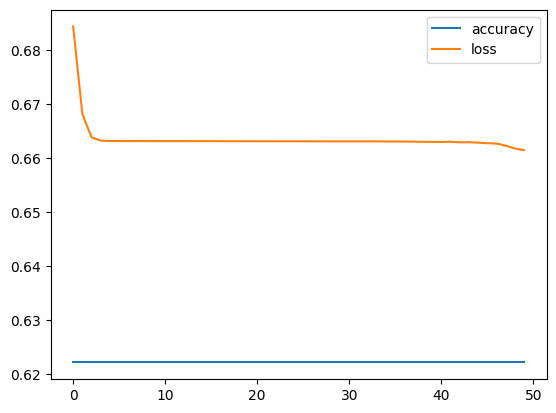

In [38]:
pd.DataFrame(history_1.history).plot()

## Build Model 2

In [39]:
tf.random.set_seed(15)

model_2 = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_2.compile(
    loss=keras.losses.binary_crossentropy,
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"]
)

scheduler = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_2 = model_2.fit(X_train_normal, y_train, epochs=100, callbacks=[scheduler])

Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3890 - loss: 0.7126 - learning_rate: 1.0000e-04
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4042 - loss: 0.7062 - learning_rate: 1.1220e-04
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4280 - loss: 0.7004 - learning_rate: 1.2589e-04
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4859 - loss: 0.6957 - learning_rate: 1.4125e-04
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5530 - loss: 0.6920 - learning_rate: 1.5849e-04
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5952 - loss: 0.6893 - learning_rate: 1.7783e-04
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6105 - loss: 0.6871 - learning_rate: 1.9953e-04
Epoch 8/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6228 - loss: 0.6852 - learning_rate: 2.2387e-04
Epoch 9/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6230 - loss: 0.6834 - learning_

### Plot Learning Rate vs. the Loss

Text(0.5, 1.0, 'Learning Rate vs. Loss')

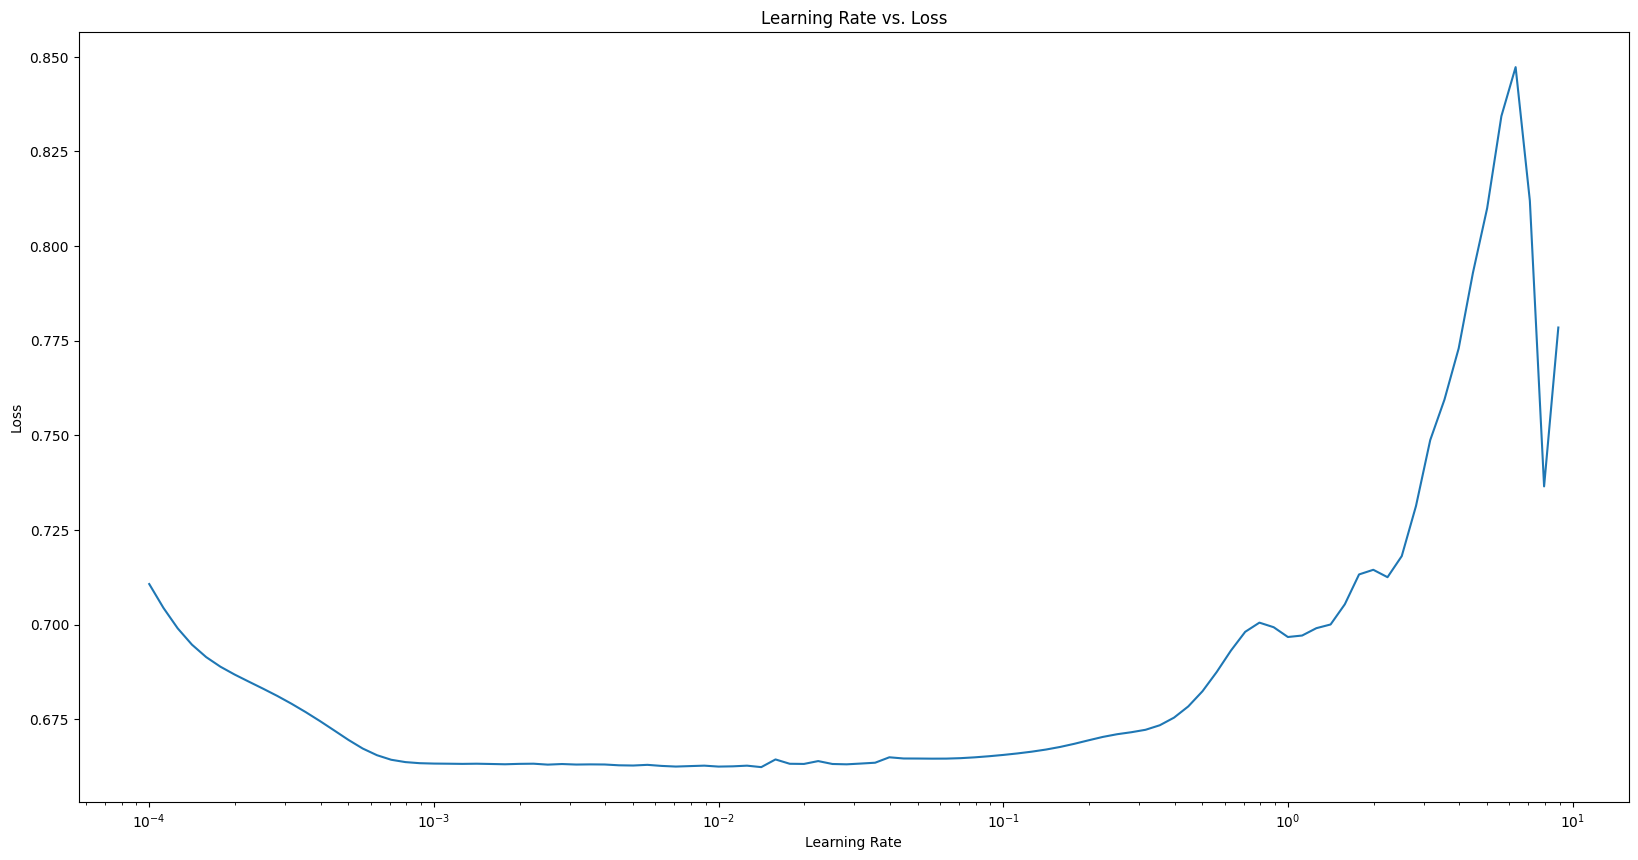

In [40]:
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(20, 10))
plt.semilogx(lrs, history_2.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs. Loss")

### Evaluate with Test Data

In [41]:
loss, acc = model_2.evaluate(X_test_normal, y_test)
print(f"Model Loss (Test Set) : {loss}")
print(f"Model Accuracy (Test Set) : {acc}")

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5464 - loss: 0.7699
Model Loss (Test Set) : 0.75921630859375
Model Accuracy (Test Set) : 0.5609756112098694


### Understanding the Model

In [51]:
weights, biases = model_2.layers[1].get_weights()
weights, weights.shape

(array([[-0.2523992 ,  0.75230736, -0.01485163, -0.23540205],
        [-0.36368698,  0.6035966 , -0.12503365,  0.90509933],
        [-0.17308414,  0.10773944, -0.8723175 , -1.3740581 ],
        [-0.5923785 , -0.6280344 , -0.4775593 ,  0.16363555]],
       dtype=float32),
 (4, 4))

In [52]:
biases, biases.shape

(array([ 0.0000000e+00, -3.6104777e-01, -2.7293053e-01, -1.5325633e-05],
       dtype=float32),
 (4,))

## Build Model 3

In [67]:
tf.random.set_seed(15)

model_3 = keras.Sequential([
    layers.Dense(256, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_3.compile(
    loss=keras.losses.binary_crossentropy,
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=["accuracy"]
)

history_3 = model_3.fit(X_train_normal, y_train, epochs=100, validation_data=(X_test_normal, y_test))

Epoch 1/100


I0000 00:00:1719225539.212486   16091 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_926', 40 bytes spill stores, 40 bytes spill loads

I0000 00:00:1719225539.321239   16093 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_926', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1719225539.343762   16089 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_926', 32 bytes spill stores, 32 bytes spill loads

I0000 00:00:1719225540.594197   16089 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1028', 4 bytes spill stores, 4 bytes spill loads



79/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6223 - loss: 0.6741

I0000 00:00:1719225544.577410   16174 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1028', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1719225545.596571   16173 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_926', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1719225545.642882   16176 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_926', 40 bytes spill stores, 40 bytes spill loads

I0000 00:00:1719225545.905294   16170 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_926', 32 bytes spill stores, 32 bytes spill loads



82/82 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.6222 - loss: 0.6739 - val_accuracy: 0.5610 - val_loss: 0.7100
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6222 - loss: 0.6649 - val_accuracy: 0.5610 - val_loss: 0.7087
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6222 - loss: 0.6637 - val_accuracy: 0.5610 - val_loss: 0.7090
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6222 - loss: 0.6623 - val_accuracy: 0.5610 - val_loss: 0.7229
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6222 - loss: 0.6641 - val_accuracy: 0.5610 - val_loss: 0.7044
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6220 - loss: 0.6617 - val_accuracy: 0.5610 - val_loss: 0.6939
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6223 - loss: 0.6626 - val_accuracy: 0.5625 - val_loss: 0.7006
Epoch 8/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6354 - loss: 0.6579 - val_accuracy: 0.5625 - val_loss: 0

<Axes: >

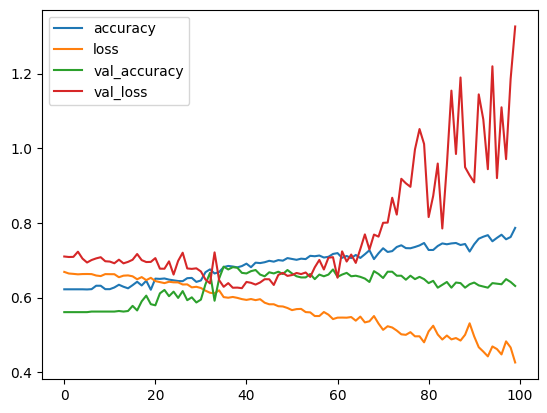

In [68]:
pd.DataFrame(history_3.history).plot()

## Build Model 4

In [71]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [72]:
model_4 = GaussianProcessClassifier(1.0 * RBF(1.0), random_state=15)

model_4.fit(X_train_normal, y_train)

GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1), random_state=15)

In [76]:
y_pred = model_4.predict(X_test_normal)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,

In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Evaluation Metrics:
Accuracy: 0.6707
Precision: 0.7687
Recall: 0.3576
F1-Score: 0.4882
ROC AUC: 0.6367


## Build Model 5

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
model_5 = RandomForestClassifier(random_state=15)

model_5.fit(X_train_normal, y_train)

RandomForestClassifier(random_state=15)

In [87]:
y_pred = model_5.predict(X_test_normal)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,

In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Evaluation Metrics:
Accuracy: 0.6509
Precision: 0.7153
Recall: 0.3403
F1-Score: 0.4612
ROC AUC: 0.6171


<Axes: >

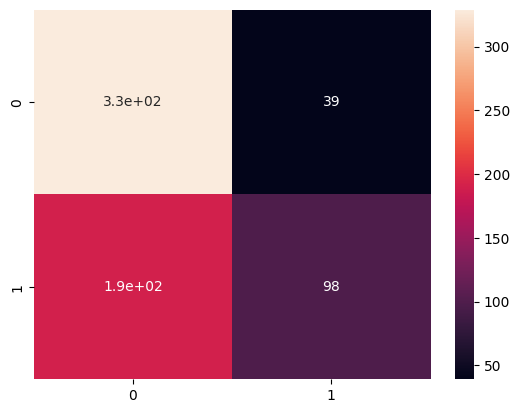

In [93]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)